In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [3]:
img = image.load_img("/content/pic_2017.jpg", target_size=(224, 224))

In [4]:
import matplotlib.pyplot as plt

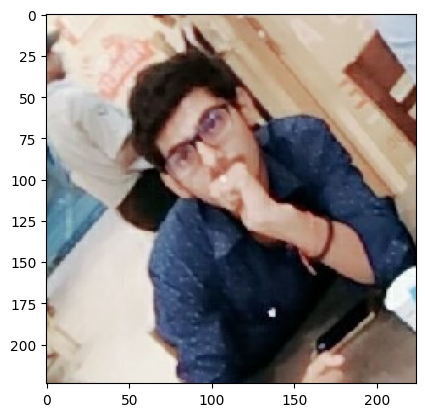

In [5]:
plt.imshow(img)

In [6]:
type(img)

PIL.Image.Image

In [14]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='constant',
       vertical_flip =False )
# ratation rnage = 40
# vertical filp is totally augmented
# widht shift , shift top and town

In [15]:
# convert the image to array for data augmentation
img = image.img_to_array(img)

In [16]:
type(img)

numpy.ndarray

In [17]:
img.shape

(224, 224, 3)

In [18]:
input_batch = img.reshape((1,)+img.shape)
# img.reshape(1,224,224,3)
#where is added because when we augment the data we convert them itinto batches

In [21]:
i = 0
for output in datagen.flow(input_batch, batch_size=1,
                          save_to_dir='/content', save_format='jpeg'):
  # it will keep making image for infinite time
    i += 1
    if i > 5:
        break  # otherwise the generator would loop indefinitely

In [27]:
import tensorflow as tf
from tensorfflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/artmesia.jpeg'
img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]


ModuleNotFoundError: No module named 'tf'